<a href="https://colab.research.google.com/github/gilsonauerswald/Bioinformatic_Projects/blob/main/Python_C2_06_Machine_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome Back to Python Course 2!**

In the previous lesson, we covered how to perform dimensionality reduction methods like PCA, MDS, NMDS. We also learned the syntax for writing functions. If you haven't completed these topics, please refer to L05 - Clustering: K-means & Hierarchical Clustering before practicing the codes for this lesson.

# **Let's Recap!**

Now that we've covered essential concepts in [L06 - Machine Learning: Classification](https://learn.omicslogic.com/Python/python-course-2-introduction-to-data-science-bioml/lesson/06-machine-learning-classification), let's take a moment to reinforce what we've learned so far. We'll start with a brief recap of the codes and techniques we've explored in the lesson.

# **Lesson Code Breakdown**

## **1. Import Packages**

In [ ]:
import pandas as pd
import numpy as np

The code snippet imports the pandas and numpy libraries, assigning aliases 'pd' and 'np' respectively. Pandas is used for data manipulation, while numpy supports array operations and mathematical functions, enhancing data analysis and computation.

## **2. Load data:**

In [ ]:
# load txt table into python object
data = pd.read_table('https://code.omicslogic.com/assets/datasets/cell_lines/CellLines_52samples_ExprData_T1.txt',sep='\t',header=(0))
data

,id,184A1,184B5,21MT1,21NT,21PT,600MPE,AU565,BT474,BT483,...,SUM225CWN,SUM229PE,SUM52PE,T47D,T47D_Kbluc,UACC812,UACC893,ZR751,ZR7530,ZR75B
0,class,Normal-like,Normal-like,Basal,Basal,Basal,Luminal,Luminal,Luminal,Luminal,...,Luminal,Basal,Luminal,Luminal,Luminal,Luminal,Luminal,Luminal,Luminal,Luminal
1,ENSG00000000419,6.06,5.25,5.15,5.36,5.22,5.32,5.3,6.64,5.6,...,5.82,6.4,4.67,6.01,6.39,7.71,5.7,5.85,5.34,5.07
2,ENSG00000001036,4.47,5.39,5.28,5.82,5.75,6.11,4.8,4.47,4.99,...,5.51,5.14,6.22,5.07,5.3,5.76,5.4,4.27,5.03,5.68
3,ENSG00000001084,4.47,6,5.77,5.76,5.76,5.78,4.01,5.14,5.11,...,6.63,4.38,6.38,4.52,4.16,3.24,4.35,2.49,5.89,4.37
4,ENSG00000001497,5.27,4.27,6.58,5.54,5.57,4.93,6.16,5.36,5.1,...,4.69,6.16,5.11,4.79,4.95,5.83,4.89,5.33,4.23,6.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6912,ENSG00000270016,0.04,0,0,0.16,0,1.26,0,0.27,0.24,...,0,0,0.72,0,0,0,0,0,0.27,0
6913,ENSG00000270149,4.39,4.98,4.78,5.07,4.81,0,5.49,3.93,5.41,...,5.66,5.18,5.03,5.78,4.86,5.08,6.3,5.38,3.93,3.99
6914,ENSG00000270161,4.09,3.9,6.49,6.22,6.35,3.68,5.96,4.78,4.83,...,3.53,4.35,4,4.97,4.37,4.88,5.56,2.84,3.87,4.67
6915,ENSG00000270168,2.17,1.6,2.7,3.12,3.79,4.19,4.39,4.91,2.1,...,6.57,3.8,4.13,3.33,3.92,0,5.6,7.68,5.25,7.21


The code snippet utilizes pandas to load a text table from a URL, assigning it to the 'data' variable. The read_table function reads the data with tab separation and interprets the first row as the header, resulting in a DataFrame for subsequent analysis.

## **3. Prepare Data:**

In [ ]:
features = data.iloc[1:, 0].values


The code extracts a specific column from the DataFrame 'data' and assigns it to the variable 'features':

features = data.iloc[1:, 0].values: This line retrieves values from the DataFrame 'data' starting from the second row (index 1) of the first column (index 0). The extracted values are stored in the 'features' variable as a NumPy array.

In [ ]:
data=data.drop(['id'], axis = 1)


The code snippet uses the drop() function on the DataFrame 'data' to remove the 'id' column, specifying axis=1 for column-wise operation. The modified DataFrame is updated without the 'id' column and assigned back to the variable 'data'.

In [ ]:
dataT = np.transpose(data)


The code uses the transpose() function from the NumPy library to perform array transposition on the 'data' array, swapping rows and columns. The transposed array is assigned to a new variable 'dataT', preserving the modified array's transposed structure.

In [ ]:
X = dataT.iloc[:, 1:].values
y = dataT.iloc[:, 0].values

The code extracts data from a transposed DataFrame 'dataT':

X = dataT.iloc[:, 1:].values: This assigns all rows and columns (excluding the first column) of 'dataT' to the variable 'X' as a NumPy array.

y = dataT.iloc[:, 0].values: This assigns values from the first column of 'dataT' to the variable 'y' as a NumPy array.

In [ ]:
#get all class names
classes = np.unique(y)
classes

array(['Basal', 'Claudin-low', 'Luminal', 'Normal-like'], dtype=object)

The code snippet uses NumPy to extract unique class names from 'y', and then 'classes' refers to the resulting array of distinct class names. This helps manage and identify the different classes present in the dataset.

## **4. Train and Test Data**

In [ ]:
#Import train_test_split and create test and train datasets
from sklearn.model_selection import train_test_split


The code snippet imports the train_test_split function from the sklearn.model_selection module, which is used for dividing data into training and testing sets. The function enables efficient data splitting to facilitate model training and evaluation.

In [ ]:
# Here test set will be 40% of all data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

The code uses the train_test_split function to divide the data into training and testing sets. It provides separate datasets (X_train, X_test, y_train, y_test) for features and target values, aiding in model development and assessment.

## **5. Import RandomForestClassifier, create new classifier model, train it and run predictions**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500)


The code imports the RandomForestClassifier class for classification using random forest algorithms. It initializes a "model" instance with 500 decision tree estimators to be used for training and prediction.

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

The code trains the RandomForestClassifier model by fitting it to the training data (X_train and y_train). This process involves constructing decision trees to learn patterns between input features and target variables, enabling the model to make predictions on new data.

In [ ]:
predictions = model.predict(X_test)
predictions

array(['Luminal', 'Luminal', 'Luminal', 'Luminal', 'Basal', 'Basal',
       'Basal', 'Luminal', 'Claudin-low', 'Basal', 'Luminal', 'Luminal',
       'Basal', 'Basal', 'Luminal', 'Basal', 'Luminal', 'Basal',
       'Luminal', 'Luminal', 'Basal'], dtype=object)

The code employs the trained RandomForestClassifier model (model) to predict target variable values for the test data (X_test) using the model's predict() method. This generates predictions based on the ensemble of decision trees, and the resulting predictions are stored in the "predictions" variable for evaluation or analysis.

## **6. Get basic classification report, model accuracy and confusion matrix**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools
import matplotlib.pyplot as plt
import matplotlib.cm as cm
c_matrix = confusion_matrix(y_test,predictions)
cr = classification_report(y_test,predictions)
model_accuracy = accuracy_score(y_test, predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The code imports functions for evaluating classification models and visualization modules. It computes a confusion matrix, generates a classification report with metrics like precision and recall, and calculates accuracy, providing insights into the model's performance on the test data.

After this, the codes and output sare interchanged, Please observe the screenshot below and change to what I have done in the below code blocks

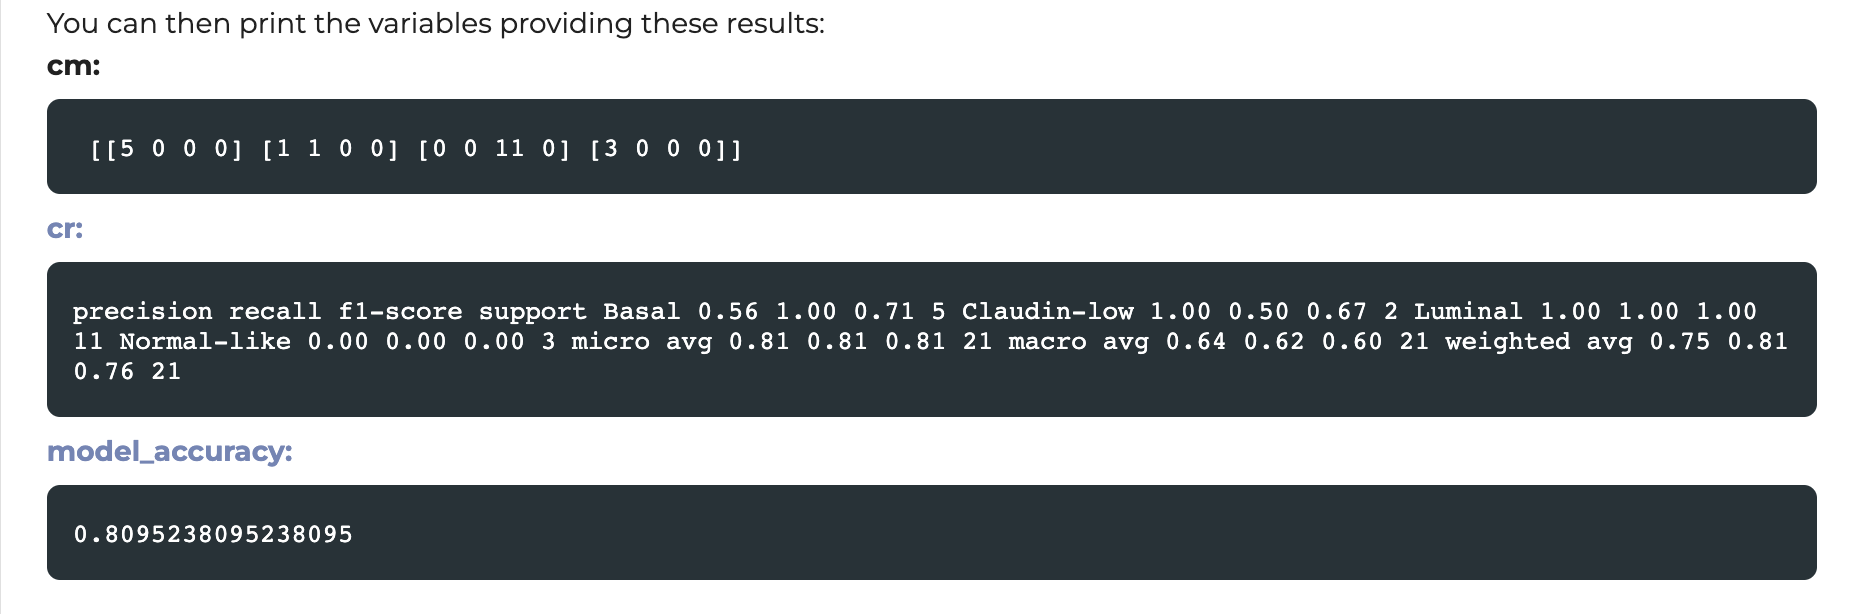

In [ ]:
c_matrix

array([[ 5,  0,  0,  0],
       [ 1,  1,  0,  0],
       [ 0,  0, 11,  0],
       [ 3,  0,  0,  0]])

The code calculates the confusion matrix (c_matrix) using the confusion_matrix function from sklearn.metrics. This matrix shows true positives, true negatives, false positives, and false negatives, aiding in evaluating the classification model's performance.

In [ ]:
model_accuracy

0.8095238095238095

The code calculates the accuracy score (model_accuracy) using the accuracy_score function from sklearn.metrics. This score quantifies the proportion of correctly predicted samples in the test set and is a key performance metric for classification models.

In [ ]:
cm

<module 'matplotlib.cm' from '/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py'>


In the code snippet you provided, cm refers to the cm module imported from the matplotlib library using the statement import matplotlib.cm as cm. The cm module in matplotlib stands for "color map" and provides various color map options for visualizations.

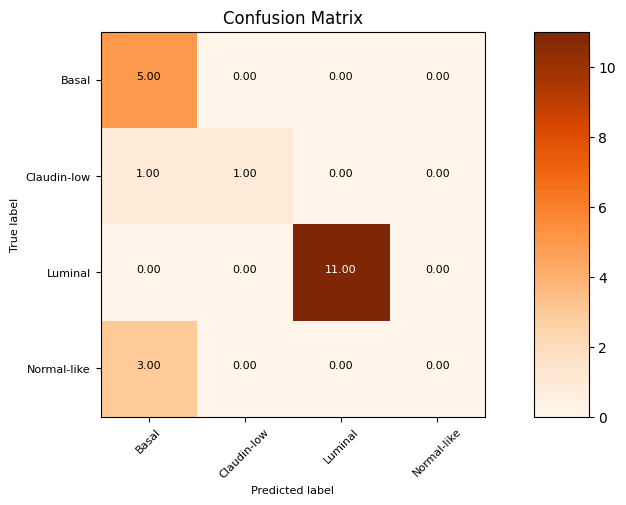

In [ ]:
#Plot confusion matrix
plt.figure(figsize = (10, 5))
plt.imshow(c_matrix, cmap=cm.Oranges)
plt.title('Confusion Matrix', size = 12)
plt.colorbar(aspect=7)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45, size = 8)
plt.yticks(tick_marks, classes, size = 8)
fmt = '.2f'
thresh = c_matrix.max() / 2.


for i, j in itertools.product(range(c_matrix.shape[0]), range(c_matrix.shape[1])):
  plt.text(j, i, format(c_matrix[i, j], fmt), fontsize = 8,
        horizontalalignment='center',
        color='white' if c_matrix[i, j] > thresh else 'black')


plt.tight_layout()
plt.ylabel('True label', size = 8)
plt.xlabel('Predicted label', size = 8)
plt.show()


The code generates a visualization of the confusion matrix using matplotlib, displaying true positive, true negative, false positive, and false negative values with color-coded cells and text labels. The plot offers insights into the classification model's performance by visualizing its predictions against actual outcomes.

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
# to make roc curve we should binarize our class labels to “one hot” vectors, so each class represent binary vector
# for example: first class = [1, 0, 0, 0], second = [0, 1, 0, 0], ...
y_test_bin_labels = label_binarize(y_test, classes=classes)
# for roc curve we are using predicted proba for our test samples
y_score = model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin_labels[:, i], y_score[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

The code generates a multi-class ROC curve by binarizing labels, calculating predicted class probabilities, and evaluating false positive rate (FPR), true positive rate (TPR), and area under the curve (AUC) values for each class. The ROC curve depicts the TPR-FPR trade-off, while AUC quantifies classification performance.

## **7. Plot ROC curves**

In [ ]:
roc_auc

{0: 0.975, 1: 1.0, 2: 1.0, 3: 1.0}


roc_auc is a dictionary that stores the calculated AUC (Area Under the Curve) values for each class in a multi-class classification problem. The keys of the dictionary correspond to the class labels, and the values represent the AUC for the corresponding class.

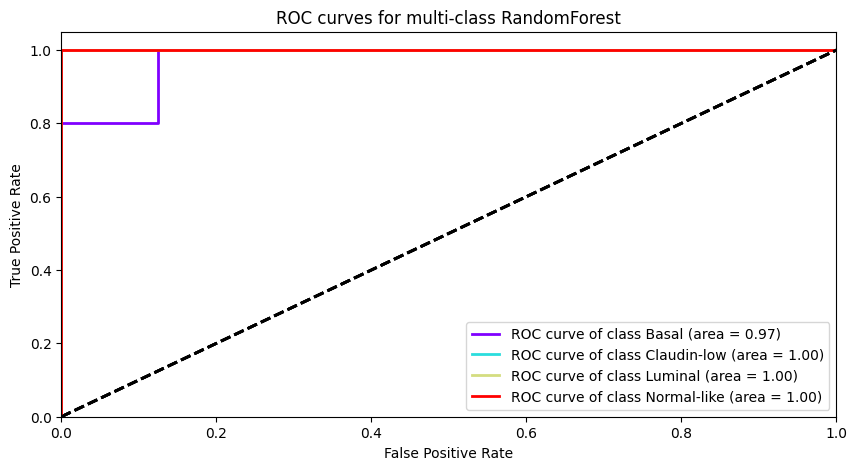

In [ ]:
plt.figure(figsize=(10, 5))
lw = 2
colors = cm.rainbow(np.linspace(0, 1, len(classes)))
for i, color in zip(range(len(classes)), colors):
  plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], roc_auc[i]))
  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate', size=10)
  plt.ylabel('True Positive Rate', size=10)
  plt.title('ROC curves for multi-class RandomForest', size=12)
  plt.legend(loc='lower right')
plt.show()

The code generates multi-class ROC curves using matplotlib by plotting the ROC curves for each class. It sets up the plot with specific dimensions, utilizes rainbow colors for classes, plots the ROC curves with false positive rates (FPR) and true positive rates (TPR), adds visual elements, and displays the plot with a legend. The ROC curves provide insights into the model's performance across multiple classes.

## **8. Support Vector Machine**

In [ ]:
#import model class (SVC stands for Support Vector Classification)
from sklearn.svm import LinearSVC
from sklearn.preprocessing import scale
X = scale(X, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


The code imports LinearSVC class for classification, scales features using the scale function, and splits data into training and testing sets. This preparation is done to enhance the performance of a linear support vector classifier (SVC).

In [ ]:
model = LinearSVC(C=1.0)


The code "model = LinearSVC(C=1.0)" creates a LinearSVC instance with the regularization parameter C set to 1.0. In support vector machines, C balances training error and decision boundary complexity. Higher C values prioritize training accuracy, while lower values prioritize generalization to unseen data. Setting C=1.0 strikes a balance, but optimal values depend on dataset characteristics.

In [ ]:
model.fit(X_train, y_train)

LinearSVC()


The "model.fit(X_train, y_train)" line trains the LinearSVC model using the provided training data. During training, the model learns parameters to create an optimal linear decision boundary that separates classes. After training, the model is prepared to make predictions on new data by leveraging patterns learned from the training set.

In [ ]:
predictions = model.predict(X_test)
c_matrix = confusion_matrix(y_test, predictions)
cr = classification_report(y_test, predictions)
model_accuracy = accuracy_score(y_test, predictions)


The code predicts class labels for the test data using a trained model and calculates a confusion matrix to evaluate the model's performance. It generates a classification report with various metrics for each class and computes the accuracy score to assess overall classification correctness.

In [ ]:
np.sum(np.abs(model.coef_))

16.49105160444954


The code computes the total absolute value of coefficients in a LinearSVC model, which quantifies the combined importance of features in classification. This provides insight into the overall influence of different features on the model's decision-making process.

In [ ]:
np.sum(np.abs(model.coef_), axis=0)
vector_weights = np.median(model.coef_, axis=0)
top_features_count = 15
top_positive_coefficients = np.argsort(vector_weights)[-top_features_count:]
top_negative_coefficients = np.argsort(vector_weights)[:top_features_count]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
top_features, top_features_weights = features[top_coefficients], vector_weights[top_coefficients]
top_features

array(['ENSG00000167755', 'ENSG00000172137', 'ENSG00000101443',
       'ENSG00000118849', 'ENSG00000167754', 'ENSG00000148346',
       'ENSG00000196136', 'ENSG00000102854', 'ENSG00000129451',
       'ENSG00000144063', 'ENSG00000175315', 'ENSG00000158089',
       'ENSG00000090339', 'ENSG00000065618', 'ENSG00000225972',
       'ENSG00000135919', 'ENSG00000115363', 'ENSG00000164237',
       'ENSG00000132182', 'ENSG00000101460', 'ENSG00000150593',
       'ENSG00000185275', 'ENSG00000189334', 'ENSG00000011028',
       'ENSG00000237289', 'ENSG00000134184', 'ENSG00000105974',
       'ENSG00000089356', 'ENSG00000130005', 'ENSG00000099984'],
      dtype=object)

The provided code evaluates feature importance and selection through the sum and median of absolute coefficients in a LinearSVC model. It identifies influential positive and negative coefficients, extracting corresponding features and their weights for analysis, contributing to a better understanding of feature impact on the model's decisions.

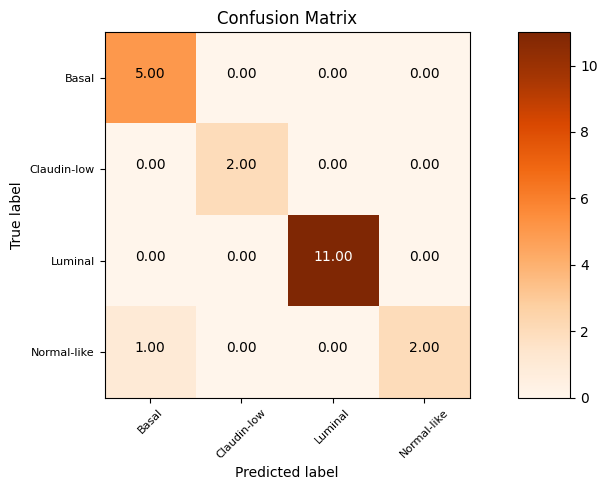

In [ ]:
n_classes = len(classes)
y_score = model.decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin_labels[:, i], y_score[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

#plot confusion matrix
plt.figure(figsize=(10, 5))
plt.imshow(c_matrix, cmap=plt.cm.Oranges)
plt.title('Confusion Matrix', size=12)
plt.colorbar(aspect=7)
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, classes, rotation=45, size=8)
plt.yticks(tick_marks, classes, size=8)
fmt = '.2f'
thresh = c_matrix.max() / 2.

for i, j in itertools.product(range(c_matrix.shape[0]), range(c_matrix.shape[1])):
  plt.text(j, i, format(c_matrix[i, j], fmt), fontsize=10,
           horizontalalignment='center',
           color='white' if c_matrix[i, j] > thresh else 'black')
  plt.ylabel('True label', size=10)
  plt.xlabel('Predicted label', size=10)
  plt.tight_layout()
plt.show()


Following the confusion matrix calculation, this code segment performs an in-depth analysis by generating ROC curves and computing AUC values for each class using roc_curve and auc functions. The resulting metrics are stored in dictionaries. Additionally, the code creates a well-formatted visualization of the confusion matrix using matplotlib, providing insights into the model's performance and detailed confusion matrix statistics.

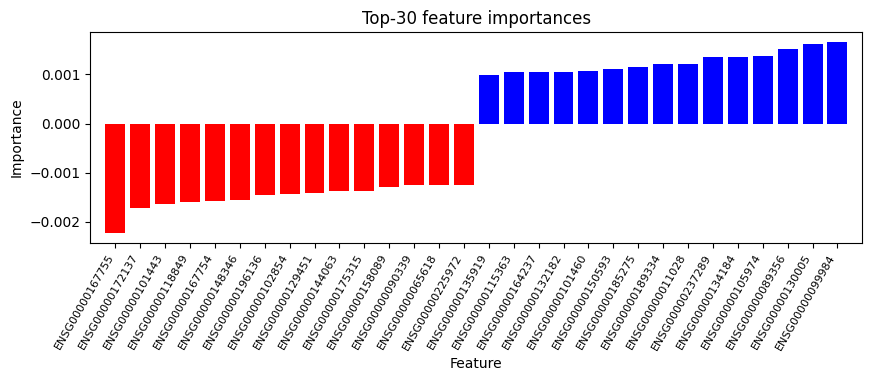

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Top-{} feature importances'.format(2 * top_features_count), size=12)
colors = ['red' if c < 0 else 'blue' for c in top_features_weights]
plt.bar(np.arange(1, 1 + 2 * top_features_count), top_features_weights, color=colors)
plt.xticks(np.arange(1, 1 + 2 * top_features_count), top_features, rotation=60, ha='right', size=8)
plt.ylabel('Importance', size=10)
plt.xlabel('Feature', size=10)
plt.xlim([0, 2 * top_features_count + 1])
plt.tight_layout(pad=5)
plt.show()

The code snippet generates a bar plot to visualize top feature importances:

It sets the figure size and title indicating the number of top features.
It assigns colors (red for negative, blue for positive) based on feature weights.
It creates the bar plot with x-values spanning top features, and y-values as feature weights.
It sets x-axis tick labels, labels for axes, and adjusts plot layout.
Finally, it displays the bar plot, offering insights into feature importance.

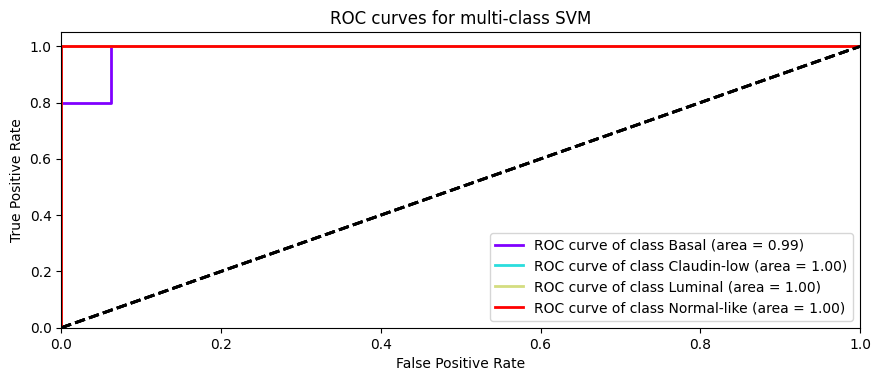

In [ ]:
plt.figure(figsize=(10, 5))
lw = 2
colors = cm.rainbow(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
  plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})' .format(classes[i], roc_auc[i]))
  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate', size=10)
  plt.ylabel('True Positive Rate', size=10)
  plt.title('ROC curves for multi-class SVM', size=12)
  plt.legend(loc='lower right')
  plt.tight_layout(pad=5)
plt.show()

The code generates a comprehensive multi-class SVM ROC curve plot by looping through classes, plotting ROC curves with rainbow colors, and adding essential plot elements like labels and legends. This visualization provides insights into the SVM's performance across multiple classes through ROC analysis.


# **Practice Codes: Try it yourself**

### **Assignment 1:**
In this assignment, you will build upon your knowledge of Machine learning. The provided code is incomplete, with missing syntax and portions. Your task is to complete the code to successfully import data and perform machine learning. To complete this, use the following txt file: https://code.omicslogic.com/assets/datasets/cell_lines/CellLines_52samples_ExprData_T1.txt.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = read_table('CellLines_52samples_ExprData_T1.txt',sep='\t',header=(0))

#check dimensions
data.shape

NameError: ignored

In [ ]:
features = data.iloc[1:, 0].values

#drop or remove "id" column from the data
data=data.drop([], axis = 1)

dataT = np.transpose(data)

X = dataT.iloc[:, 1:].values
y = dataT.iloc[:, 0].values
str(features)

In [ ]:
classes = np.unique(y)
n_classes = len(classes)
str(classes)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =(X, y, test_size=0.4, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#define Random forest model
model =(n_estimators=500)

#fit model on training data
model.fit(X_train, y_train)

#Predict test data
predictions = model.predict(X_test)
#str(predictions)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools
import matplotlib.pyplot as plt
import matplotlib.cm as cm


#compute confusion matrix
c_matrix = (y_test,predictions)

#create classification report
cr = classification_report(y_test,predictions)

#Compute model accuracy
model_accuracy = accuracy_score(y_test, predictions)

In [ ]:
c_matrix

In [ ]:
cr

In [ ]:
model_accuracy

In [ ]:
#Plot confusion matrix
plt.figure(figsize = (10, 5))
plt.imshow(c_matrix, cmap=cm.Oranges)
plt.title('Confusion Matrix', size = 12)
plt.colorbar(aspect=7)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45, size = 8)
plt.yticks(tick_marks, classes, size = 8)

fmt = '.2f'
thresh = c_matrix.max() / 2.

for i, j in itertools.product(range(c_matrix.shape[0]), range(c_matrix.shape[1])):
    plt.text(j, i, format(c_matrix[i, j], fmt), fontsize = 8,
                horizontalalignment='center',
                color='white' if c_matrix[i, j] > thresh else 'black')

plt.grid(None)
plt.tight_layout()
plt.ylabel('True label', size = 8)
plt.xlabel('Predicted label', size = 8)
plt.show()

In [ ]:
#ROC curves
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# to make roc curve we should binarize our class labels to “one hot” vectors, so each class represent binary vector
# for example: first class = [1, 0, 0, 0], second = [0, 1, 0, 0], ...
y_test_bin_labels = label_binarize(y_test, classes=classes)
# for roc curve we are using predicted proba for our test samples
y_score = model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_labels[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
#Close previous plot
plt.close()

#Plot ROC curves
plt.figure(figsize=(10, 5))

lw = 2

colors = cm.rainbow(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             .format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', size=10)
plt.ylabel('True Positive Rate', size=10)
plt.title('ROC curves for multi-class RandomForest', size=12)
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import scale
X = scale(X, axis=1)

#prepare training & Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#define SVM linear model
model = (C=1.0)

#fit model on training data
model.(X_train, y_train)

#predict test data
predictions = model.predict(X_test)
#str(predictions)

In [ ]:
#Compute  confusion matrix
c_matrix = confusion_matrix(y_test,predictions)

#Compute classification Report
cr = (y_test,predictions)

#Compute classification accuracy
model_accuracy = (y_test, predictions)

In [ ]:
c_matrix

In [ ]:
cr

In [ ]:
model_accuracy

In [ ]:
top_features_count = 15
vector_weights = np.median(model.coef_, axis=0)
top_positive_coefficients = np.argsort(vector_weights)[-top_features_count:]
top_negative_coefficients = np.argsort(vector_weights)[:top_features_count]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
top_features, top_features_weights = features[top_coefficients], vector_weights[top_coefficients]
#str(top_features)

In [ ]:
y_score = model.decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_labels[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
#Close previous plots
plt.close()

# plot confusion matrix
plt.figure(figsize=(10, 5))
plt.imshow(c_matrix, cmap=plt.cm.Oranges)
plt.title('Confusion Matrix', size=12)
plt.colorbar(aspect=7)
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, classes, rotation=45, size=8)
plt.yticks(tick_marks, classes, size=8)

fmt = '.2f'
thresh = c_matrix.max() / 2.

for i, j in itertools.product(range(c_matrix.shape[0]), range(c_matrix.shape[1])):
    plt.text(j, i, format(c_matrix[i, j], fmt), fontsize=10,
                horizontalalignment='center',
                color='white' if c_matrix[i, j] > thresh else 'black')

plt.ylabel('True label', size=10)
plt.xlabel('Predicted label', size=10)
plt.tight_layout()
plt.show()

In [ ]:
# Close previous plot
plt.close()

# plot features importances
plt.figure(figsize=(10, 5))
plt.title('Top-{} feature importances'.format(2 * top_features_count), size=12)
colors = ['red' if c < 0 else 'blue' for c in top_features_weights]
plt.bar(np.arange(1, 1 + 2 * top_features_count), top_features_weights, color=colors)
plt.xticks(np.arange(1, 1 + 2 * top_features_count), top_features, rotation=60, ha='right', size=8)
plt.ylabel('Importance', size=10)
plt.xlabel('Feature', size=10)
plt.xlim([0, 2 * top_features_count + 1])
plt.tight_layout(pad=5)
plt.show()

In [ ]:
# Close previous plot
plt.close()

# plot ROC curves
plt.figure(figsize=(10, 5))

lw = 2
colors = cm.rainbow(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             .format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', size=10)
plt.ylabel('True Positive Rate', size=10)
plt.title('ROC curves for multi-class SVM', size=12)
plt.legend(loc='lower right')
plt.tight_layout(pad=5)
plt.show()

In [ ]:
predictions.shape

Finish !

In [ ]:
model = RandomForestClassifier(n_estimators=500)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)